<a href="https://colab.research.google.com/github/wchon/Cartoonization-App/blob/main/Cartoonization-App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import imageio
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys

from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = '4130proj_part2'


sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My\ Drive/$FOLDERNAME

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/4130proj_part2




1.   Functionalize median filter\
    https://codereview.stackexchange.com/questions/191974/median-filter-implementation-in-python
2.   Functionalize adaptive threshold\
    https://medium.com/geekculture/image-thresholding-from-scratch-a66ae0fb6f09
    https://blog.csdn.net/weixin_42272768/article/details/110817275
1.   Functionalize bilateral filter\
    https://github.com/nuwandda/Bilateral-Filter/blob/master/bilateral_filter.py











In [ ]:
def median_filter(img, kernel_size):
  dummy = []
  index = kernel_size // 2

  for i in range(len(img)):
    for j in range(len(img.shape[0])):
      for k in range(len(img.shape[1])):
        if (i + k - index < 0) or  (i + k - index > len(img) - 1):
          for l in range(kernel_size):
            dummy.append(0)
        else:
          if (j + k - index < 0) or (j + index > len(img.shape[0]) - 1):
            dummy.append(0)
          else:
            for m in range(kernel_size):
              dummy.append(img[i + k - index][j + m - index])
      dummy.sort()
      img[i][j] = dummy[len(dummy) // 2]
      dummy = []

  return img

In [ ]:
def adaptive_thresh_mean(img, kernel_size, c):
  assert kernel_size % 2 == 1 and kernel_size > 0, "Kernel must be an odd pos int"

  h, w = img.shape
  binary_arr = np.zeros((h, w), dtype = np.uint8)

  for i in range(h):
    for j in range(w):
      Xmin = max(0, i - kernel_size // 2)
      Ymin = max(0, j - kernel_size // 2)
      Xmax = min(h - 1, i + kernel_size // 2)
      Ymax = min(w - 1, j + kernel_size // 2)

      blk = img[Xmin : Xmax + 1, Ymin : Ymax + 1]
      threshold = np.mean(blk) - c

      if img[i,j] > threshold:
        binary_arr[i,j] = 255

  return binary_arr

In [ ]:
def cartoonify(originalImage):
    print(originalImage.shape[0],originalImage.shape[1])
    sizeY = originalImage.shape[0]
    sizeX = originalImage.shape[1]  #x = 960 orginal #y = 540 original

    ReSized1 = cv2.resize(originalImage, (sizeX, sizeY))
    grayScaleImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (sizeX, sizeY))
#applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 3) #5 original #13 testing
    ReSized3 = cv2.resize(smoothGrayScale, (sizeX, sizeY))
#retrieving the edges for cartoon effect
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255,
      cv2.ADAPTIVE_THRESH_MEAN_C, # cv2.ADAPTIVE_THRESH_MEAN_C cv2.ADAPTIVE_THRESH_GAUSSIAN_C
      cv2.THRESH_BINARY, 9, 9)    # cv2.THRESH_BINARY, 27, 9)
    ReSized4 = cv2.resize(getEdge, (sizeX, sizeY))
    #ke = (3,3)
    #ret,thresh1 = cv2.threshold(smoothGrayScale, 100, 255, cv2.THRESH_BINARY)
    #ReSized4 = cv2.resize(thresh1, (sizeX, sizeY))

#applying bilateral filter to remove noise
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalImage, 9, 800, 800) #9, 300, 300 original
    ReSized5 = cv2.resize(colorImage, (sizeX, sizeY))
    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
    ReSized6 = cv2.resize(cartoonImage, (sizeX, sizeY))


#bilateral filter test 2
    colorImage2 = cv2.bilateralFilter(originalImage, 9, 800, 100) #300,300 original
    ReSized51 = cv2.resize(colorImage2, (sizeX, sizeY))
    cartoonImage2 = cv2.bitwise_and(colorImage2, colorImage, mask=getEdge)
    ReSized61 = cv2.resize(cartoonImage2, (sizeX, sizeY))


#Plotting the whole transition
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6, ReSized51, ReSized61]
    fig, axes = plt.subplots(4,2, figsize=(15,15), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
    plt.show()

300 450


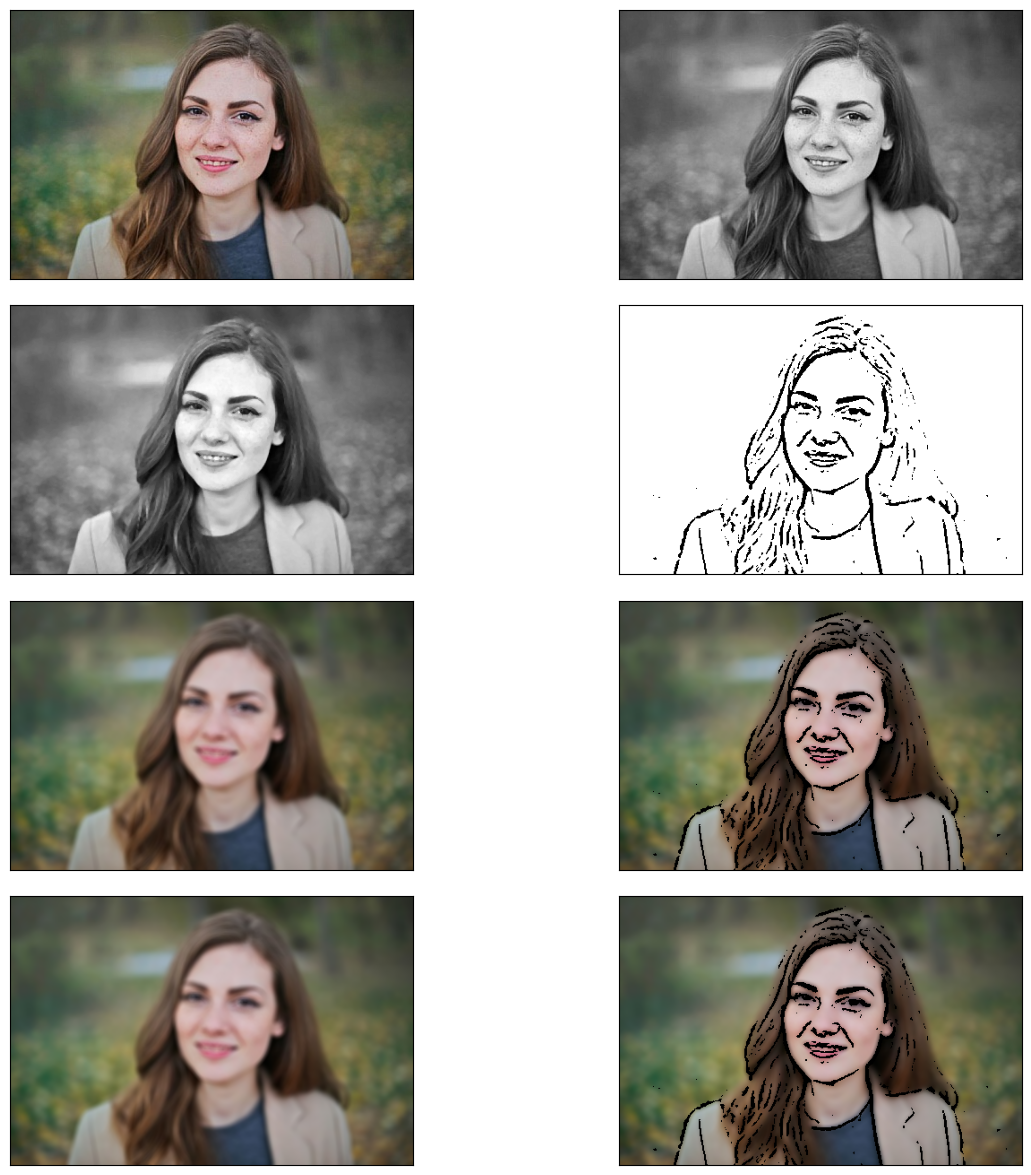

982 768


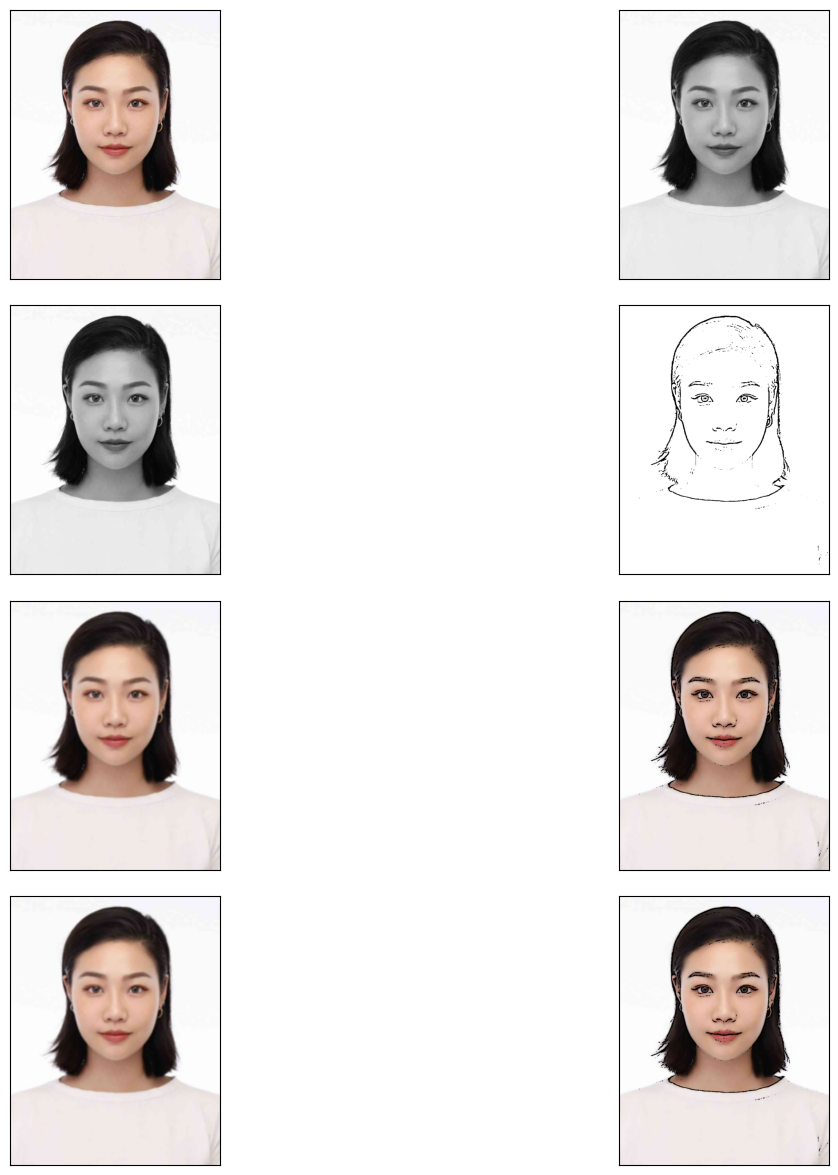

2124 1689


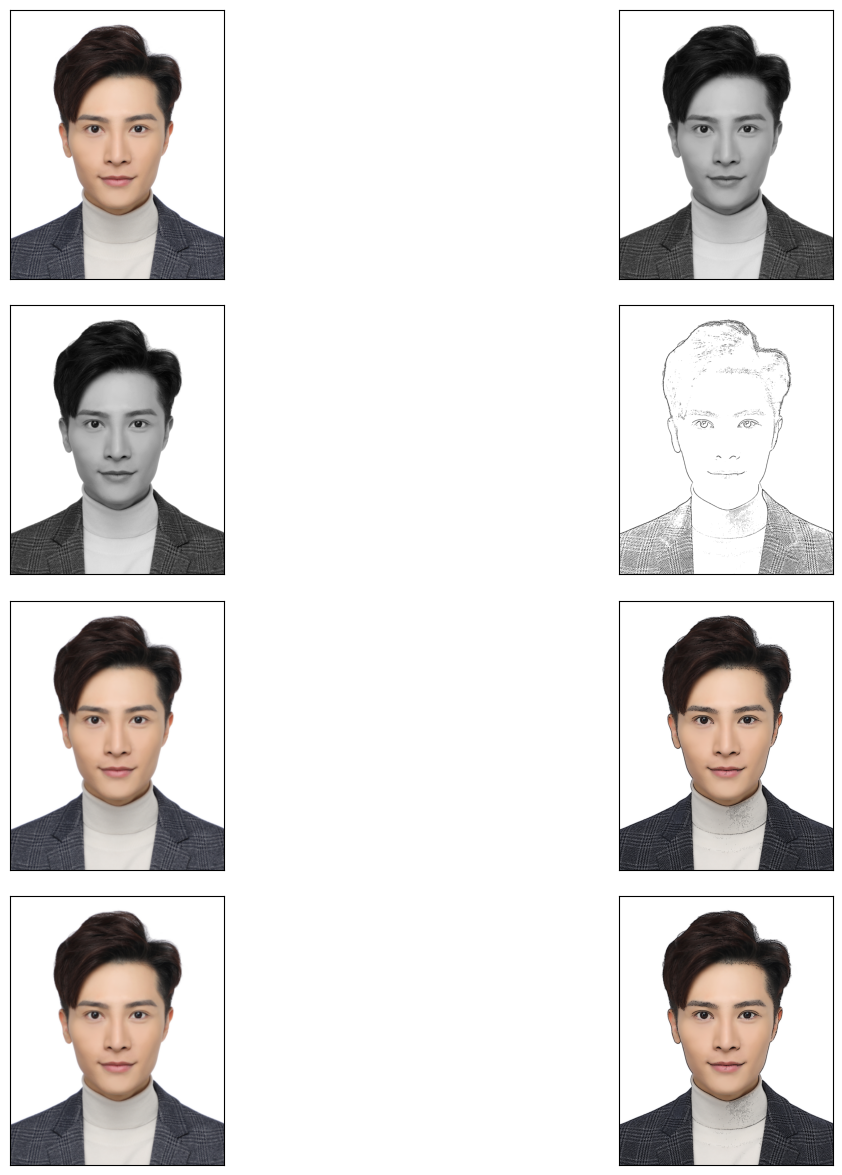

In [ ]:
originalImage = cv2.imread('image_64.jpg')
originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
outputImg = cartoonify(originalImage);

originalImage = cv2.imread('testImg3.jpg')
originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
outputImg = cartoonify(originalImage);

originalImage4 = cv2.imread('testImg4.jpg')
originalImage4 = cv2.cvtColor(originalImage4, cv2.COLOR_BGR2RGB)
outputImg4 = cartoonify(originalImage4);


#originalImage2 = cv2.imread('testImg6.jpeg')
#originalImage2 = cv2.cvtColor(originalImage2, cv2.COLOR_BGR2RGB)
#outputImg2 = cartoonify(originalImage2);

